In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
def xls_to_df(path: str) -> pd.DataFrame:
    df = pd.read_excel(path)
    df2 = df.filter([
        'sample',
        'mean0',
        'SEM0',
        'mean1',
        'SEM1'
        # 'mean50',
        # 'SEM50',
        # 'mean100',
        # 'SEM100',
    ])
    df2 = df2[df2['mean0'].notna()]
    names = []
    days = [1, 4, 7, 11, 7, 11, 1, 4, 7, 11, 7, 11, 1, 4, 7, 11, 7, 11]
    for idx, row in enumerate(df2['sample']):
        name = row[:-5]
        names.append(name.strip(' '))
    df2 = df2.drop(labels='sample', axis=1)
    df2.insert(loc=0, column='name', value=names)
    df2.insert(loc=1, column='day', value=days)
    df10x = df2[df2['name'].isin(['K', 'WW2', 'WW3'])]
    return df10x

In [8]:
def formatted_errorbar(df: pd.DataFrame, title: str, ax, dilution: int):

    k = df[df['name'] == 'K']
    ww2 = df[df['name'] == 'WW2']
    ww3 = df[df['name'] == 'WW3']

    ax.errorbar(
        x=k['day'],
        y=k[f'mean{dilution}'],
        yerr=k[f'SEM{dilution}'],
        fmt='o--',
        color='g',
        label='BG-11'
    )
    ax.errorbar(
        x=ww2['day'],
        y=ww2[f'mean{dilution}'],
        yerr=ww2[f'SEM{dilution}'],
        fmt='o--',
        color='orange',
        label='WW2'
    )
    ax.errorbar(
        x=ww3['day'],
        y=ww3[f'mean{dilution}'],
        yerr=ww3[f'SEM{dilution}'],
        fmt='o--',
        color='r',
        label='WW3'
    )

    ax.legend()
    ax.grid()
    ax.set_xlim([0, 14])
    ax.set_ylim([-10, 500])
    ax.set_yticks([0, 100, 200, 300, 400, 500])
    ax.set_ylabel(
        'Aktywność MlrA\n[mU mg$^{-1}$]',
        fontdict={'fontsize': 18}
    )
    ax.set_title(title, loc='left', pad=10)

In [9]:
df = xls_to_df('data/final.xlsx')

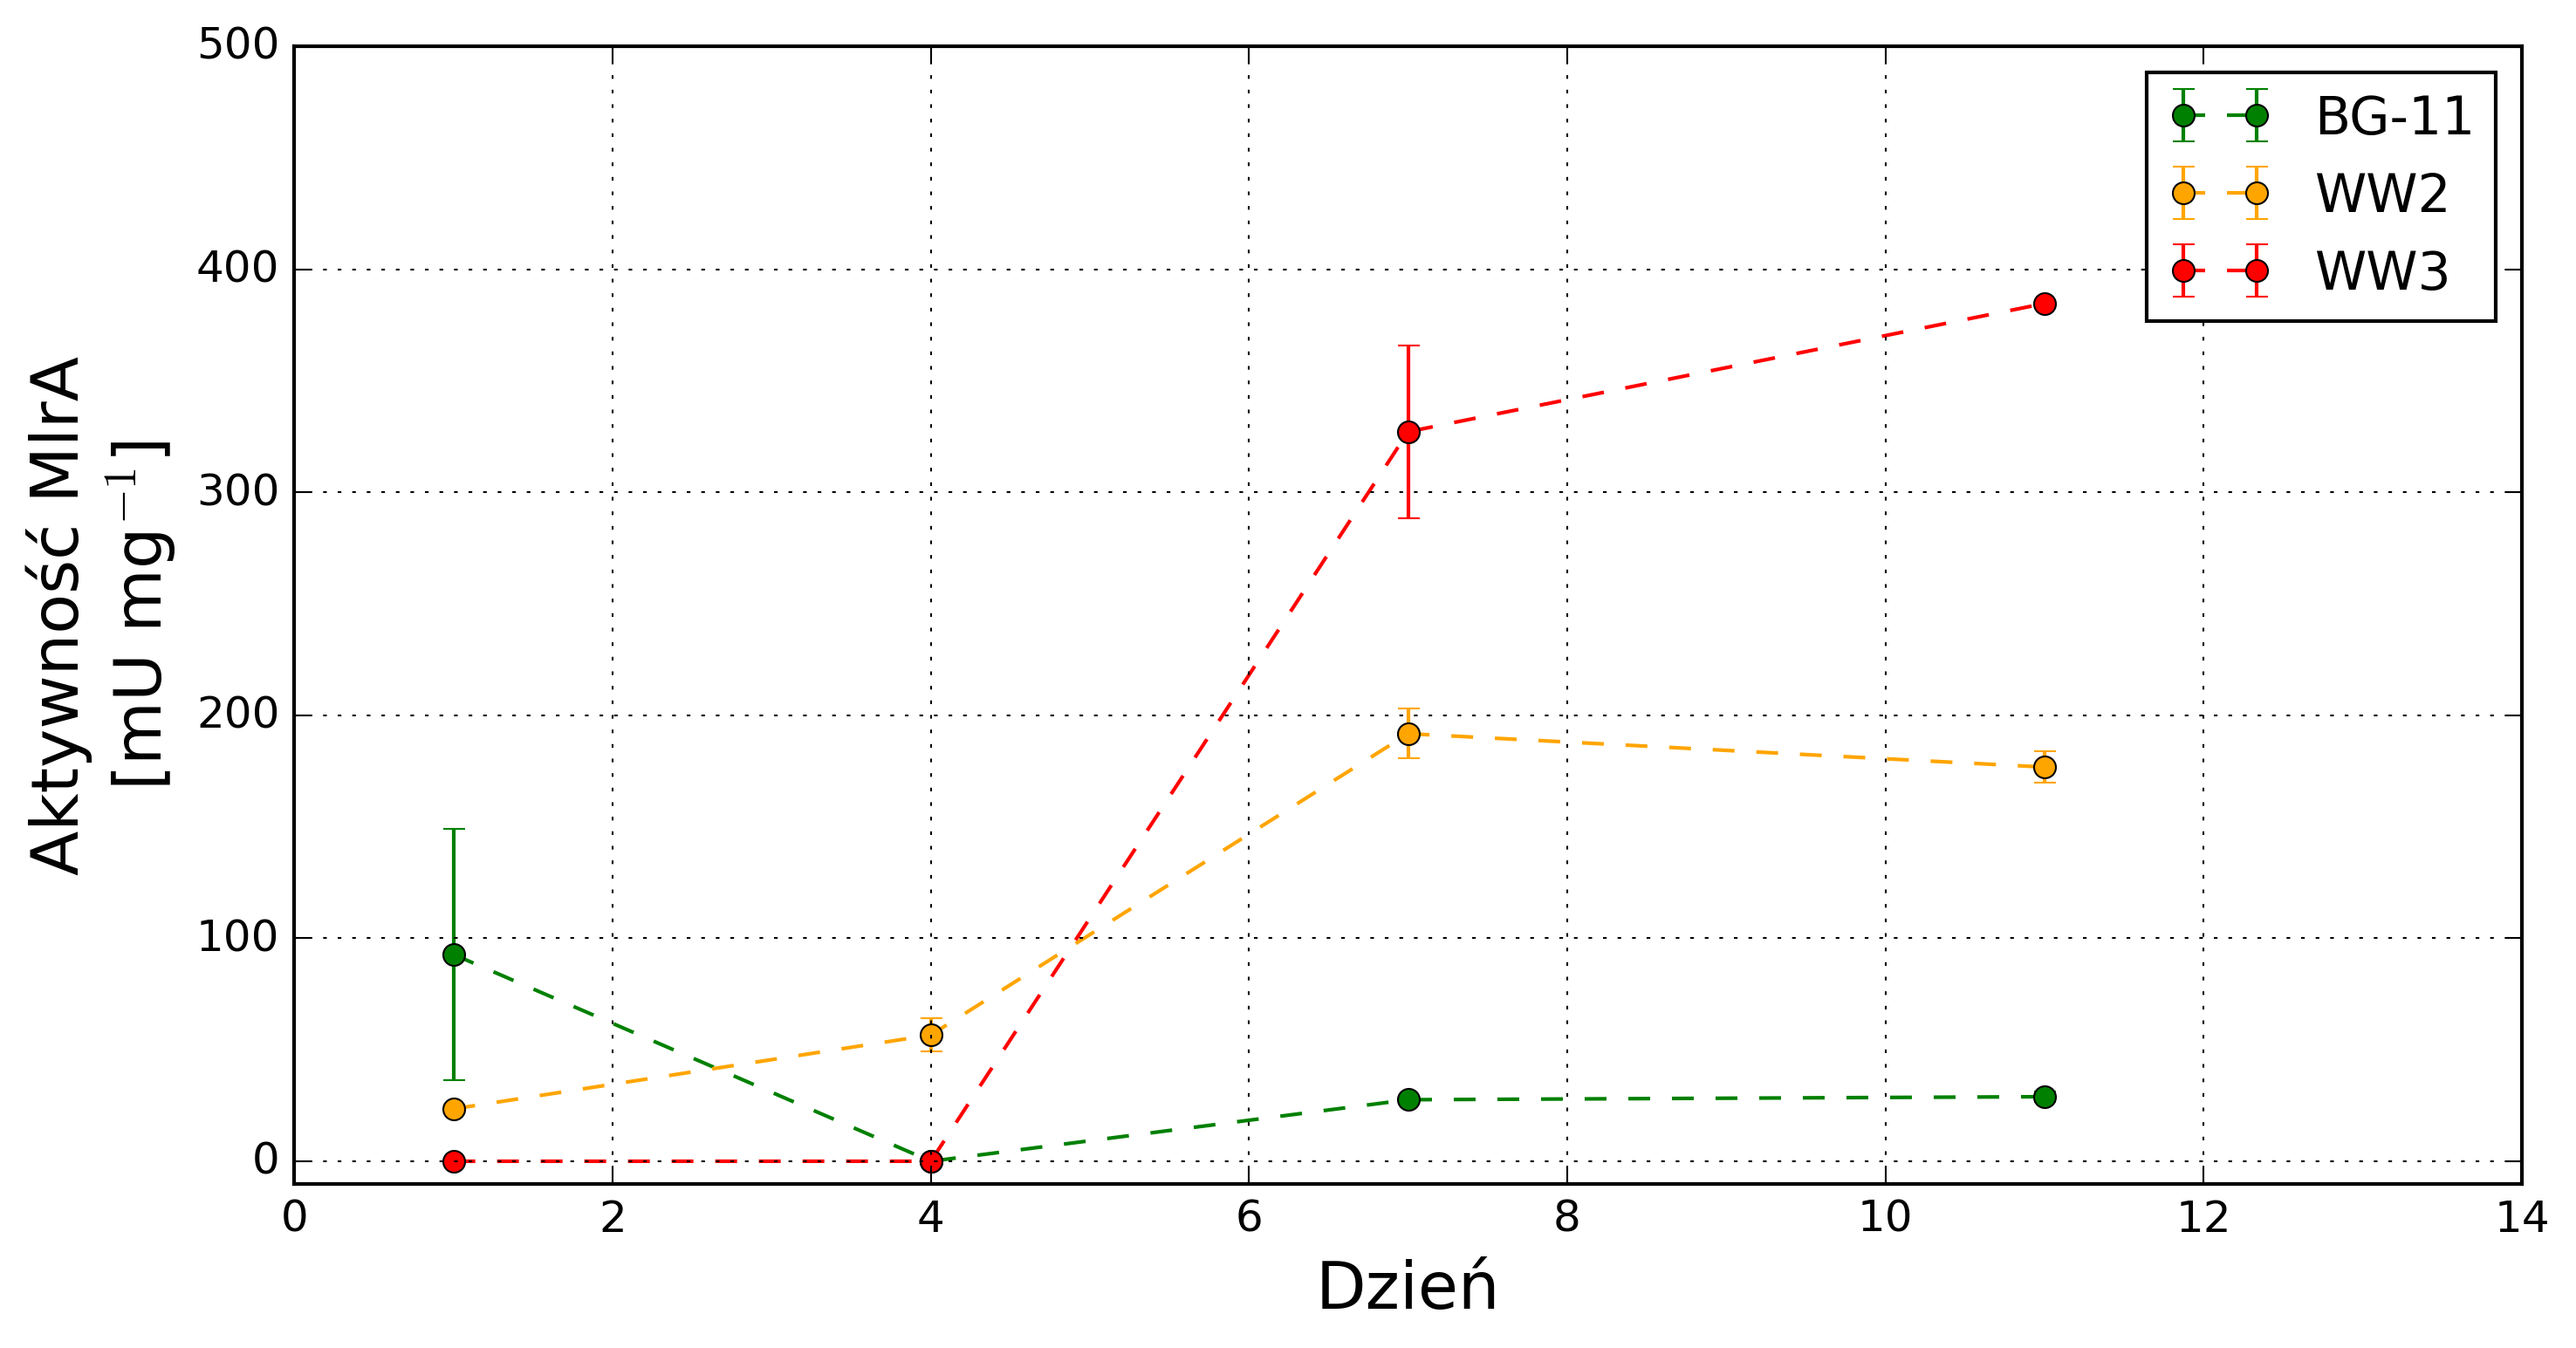

In [10]:
fig, ax1 = plt.subplots(dpi=300, figsize=(10, 5), facecolor='#ffffff')
plt.style.use('classic')
formatted_errorbar(df=df, ax=ax1, dilution=0, title='')
fig.tight_layout()
ax1.set_xlabel('Dzień', fontdict={'fontsize': 18})
plt.savefig('../manuscript/figures/mlra_activity.png', bbox_inches='tight')
plt.show()
plt.close(fig)

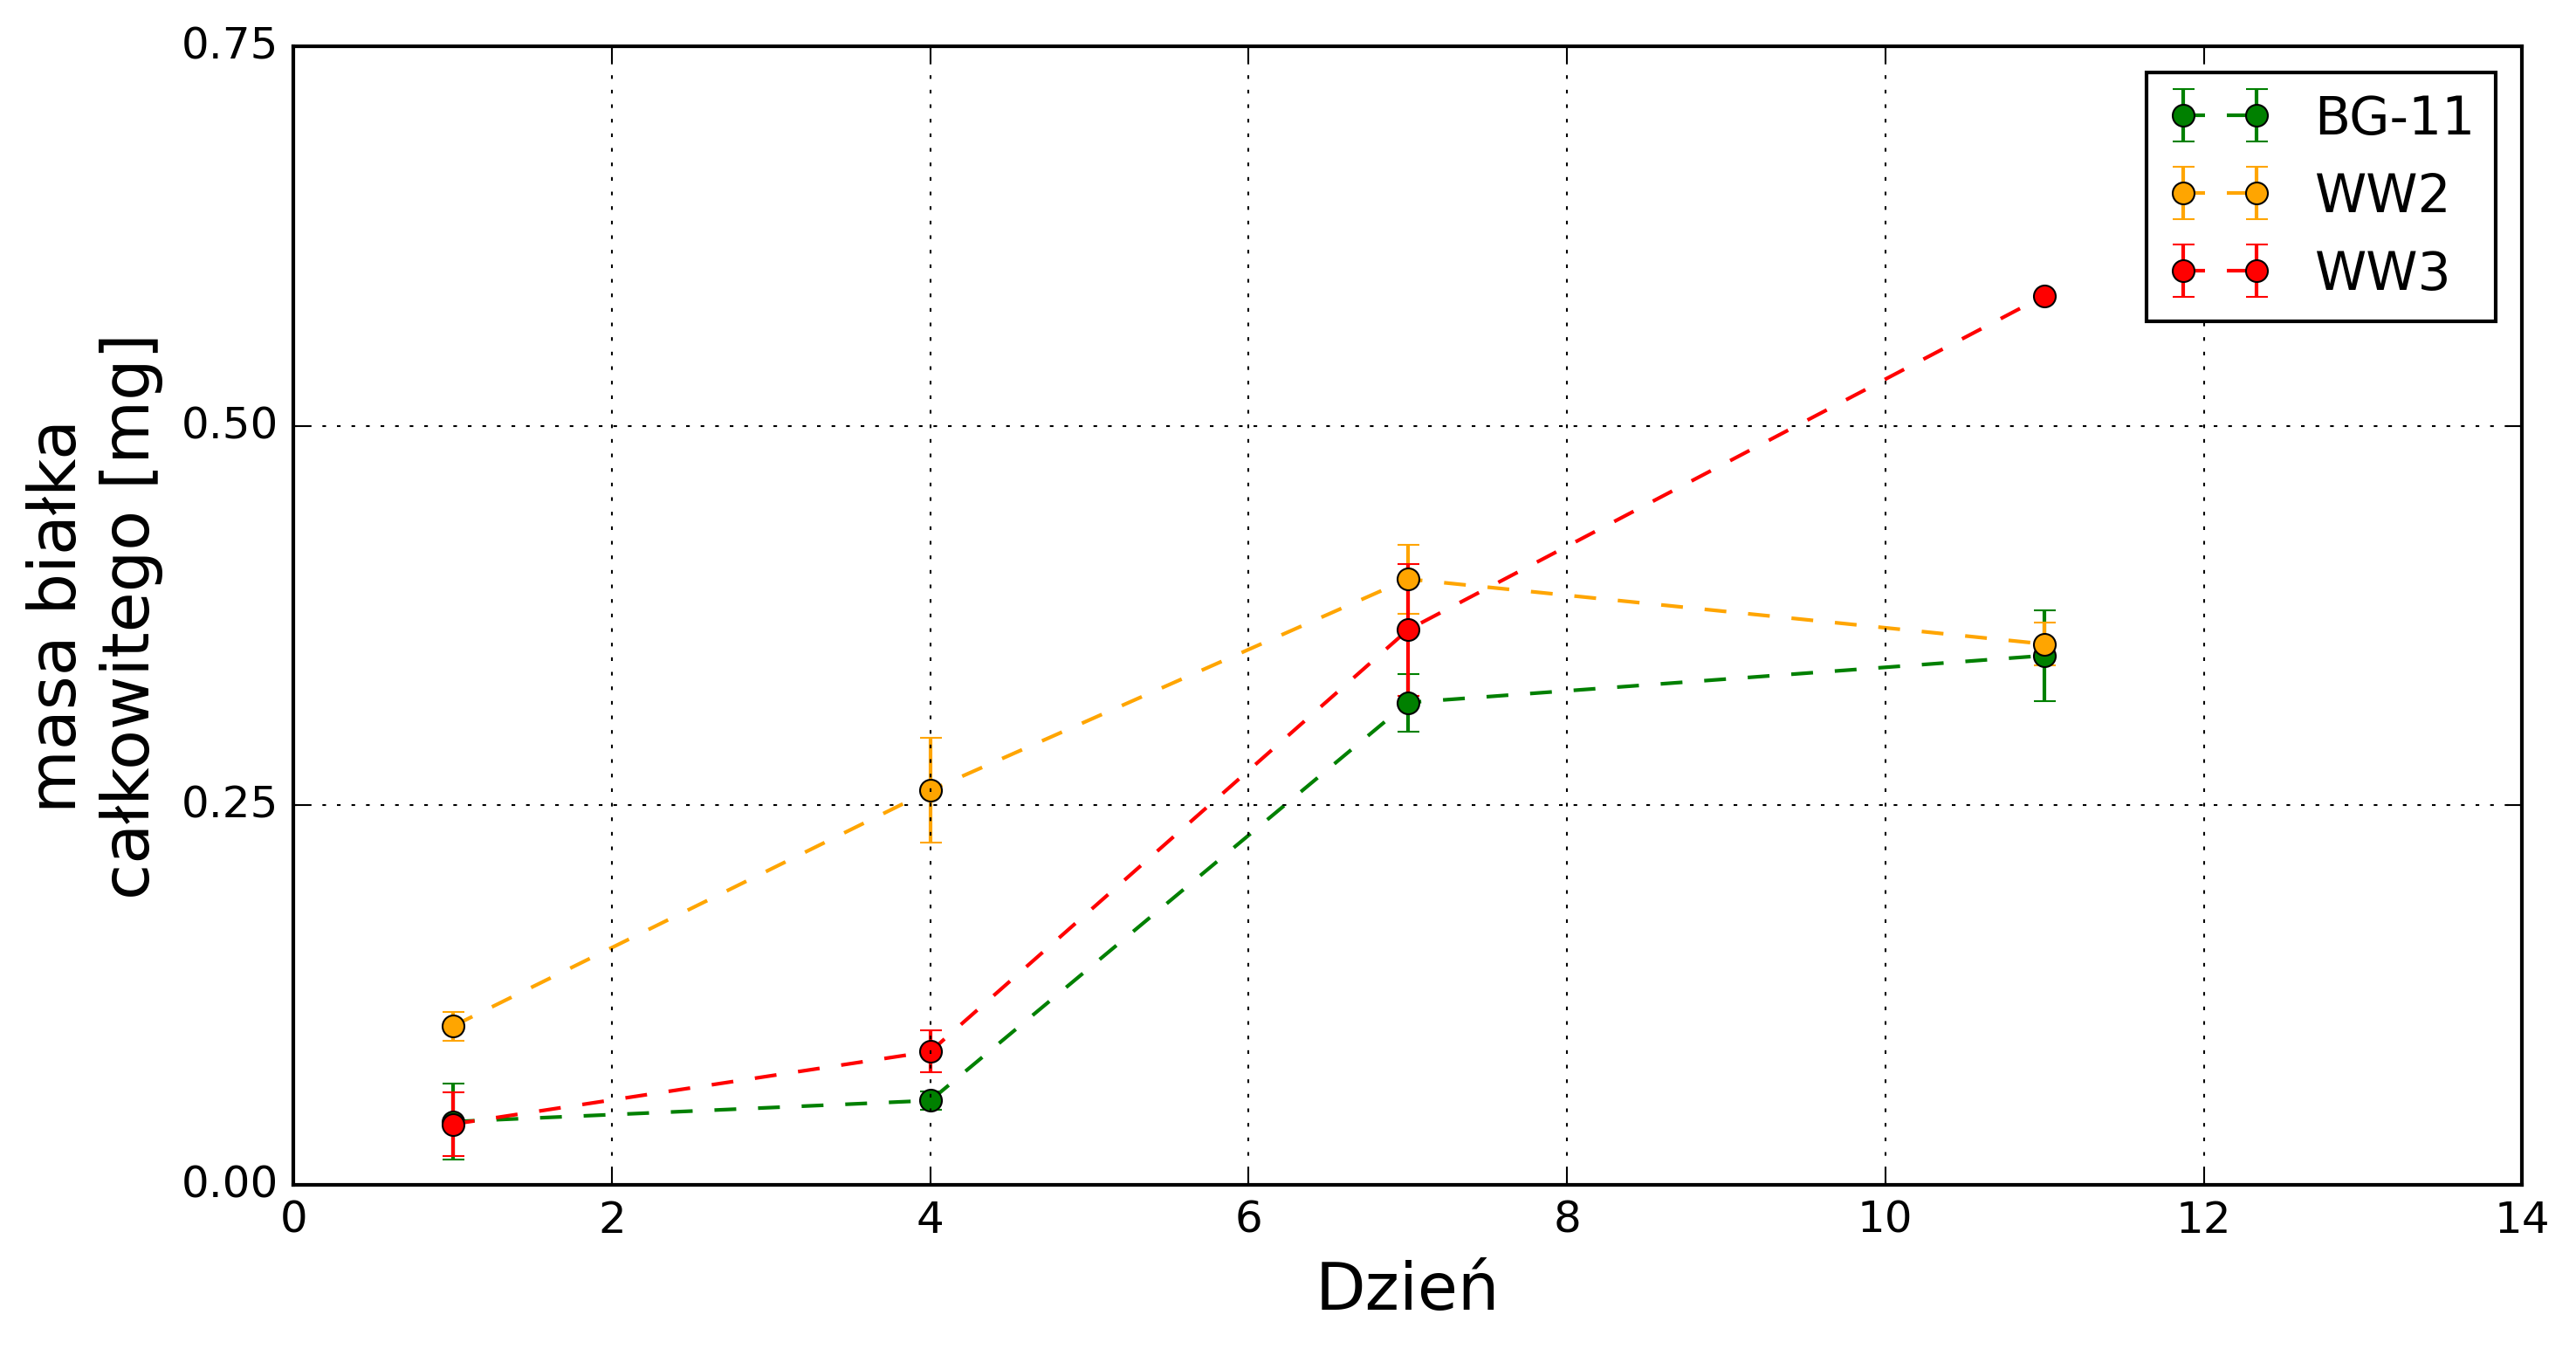

In [17]:
fig, ax1 = plt.subplots(dpi=300, figsize=(10, 5), facecolor='#ffffff')
plt.style.use('classic')
formatted_errorbar(df=df, ax=ax1, dilution=1, title='')
fig.tight_layout()
ax1.set_xlabel('Dzień', fontdict={'fontsize': 18})
ax1.set_ylim([0, 0.75])
ax1.set_yticks([0, 0.25, 0.5, 0.75])
ax1.set_ylabel('masa białka\ncałkowitego [mg]')
plt.savefig('../manuscript/figures/totalprot.png', bbox_inches='tight')
plt.show()
plt.close(fig)